In [144]:
import numpy as np
from glob import glob
import tifffile as tf
import matplotlib.pyplot as plt
import stitching
import cv2

In [131]:
images = []

# get all images from Y:\Projects\piescope\piescope_dev\vol
for i in glob(r'Y:\Projects\piescope\piescope_dev\tile\*.tif'):
    print(i)    
    images.append(tf.imread(i))
 



Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-01-001792PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-09-153392PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-17-308008PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-26-045762PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-34-148251PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-42-264247PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-50-970031PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-58-59-042007PM.tif
Y:\Projects\piescope\piescope_dev\tile\2023-05-08-03-59-07-130031PM.tif


In [15]:
import os
for i, image in enumerate(images):
    channel_1 = image[:,:,0]
    #save channel_1 to folder called channel_1

    # channel_2 = image[:,:,1]
    # #save channel_2 to folder called channel_2
    os.makedirs(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\\', exist_ok=True)
    tf.imsave(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\\' + str(i) + '.tif', channel_1)

In [132]:
im = tf.imread(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\0.tif')

In [150]:
image8bit = cv2.normalize(im, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\0_8bit.tif', image8bit)

True

In [134]:
print(im.shape)
descriptor = cv2.SIFT_create()
# matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

keypoints, descriptors = descriptor.detectAndCompute(image8bit, None)

# def get_matches(descriptors1, descriptors2):
#     return matcher.match(descriptors1, descriptors2)



(2048, 2048)


In [135]:
print(keypoints)

(<KeyPoint 0000021F93ABFF00>, <KeyPoint 0000021F93BAE8D0>, <KeyPoint 0000021F93C1FB10>, <KeyPoint 0000021F93C1FCF0>, <KeyPoint 0000021F93BC0FC0>, <KeyPoint 0000021F93BC0F60>, <KeyPoint 0000021F93BC0900>, <KeyPoint 0000021F93D243F0>, <KeyPoint 0000021F93D244B0>, <KeyPoint 0000021F93D24510>, <KeyPoint 0000021F93C147E0>, <KeyPoint 0000021F93C14B40>, <KeyPoint 0000021F93C14810>, <KeyPoint 0000021F93AA09C0>, <KeyPoint 0000021F93C05450>, <KeyPoint 0000021F93BDB060>, <KeyPoint 0000021F93BDB090>, <KeyPoint 0000021F93BDB120>, <KeyPoint 0000021F93BDBA20>, <KeyPoint 0000021F93BDBE70>, <KeyPoint 0000021F93BDB510>, <KeyPoint 0000021F93BDB1E0>, <KeyPoint 0000021F93BDB360>, <KeyPoint 0000021F93BDBD50>, <KeyPoint 0000021F93C2DC60>, <KeyPoint 0000021F93C2DF90>, <KeyPoint 0000021F93C2D300>, <KeyPoint 0000021F93C2DF00>, <KeyPoint 0000021F93C2DA50>, <KeyPoint 0000021F93C2D3F0>, <KeyPoint 0000021F939D7210>, <KeyPoint 0000021F93C0ED80>, <KeyPoint 0000021F93C0EB10>, <KeyPoint 0000021F93C0EDE0>, <KeyPoint 000

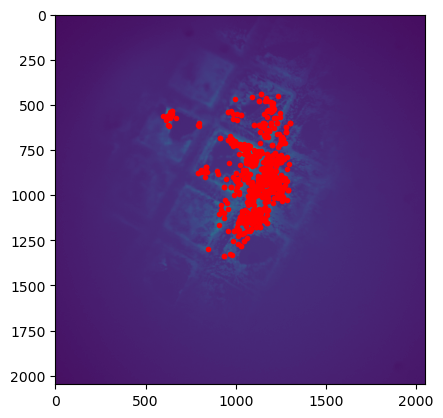

In [136]:
plt.imshow(image8bit)
# plot keypoints
plt.scatter([p.pt[0] for p in keypoints], [p.pt[1] for p in keypoints], c='r', marker='.')
plt.show()


In [137]:
im2 = tf.imread(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\1.tif')


In [149]:
image8bit2 = cv2.normalize(im2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\1_8bit.tif', image8bit2)

True

In [139]:
descriptor2 = cv2.SIFT_create()
# matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

keypoints2, descriptors2 = descriptor2.detectAndCompute(image8bit2, None)


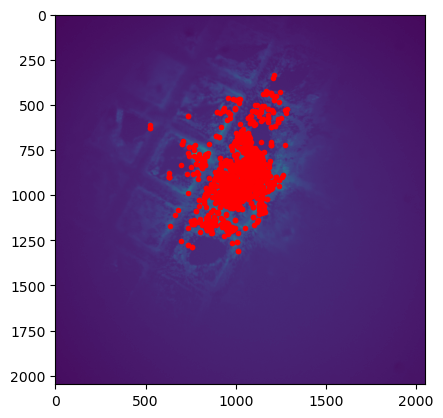

In [140]:
plt.imshow(image8bit2)
# plot keypoints
plt.scatter([p.pt[0] for p in keypoints2], [p.pt[1] for p in keypoints2], c='r', marker='.')
plt.show()


In [152]:
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([r'Y:\Projects\piescope\piescope_dev\tile\channel_1\0_8bit.tif', r'Y:\Projects\piescope\piescope_dev\tile\channel_1\1_8bit.tif'], masks=None)


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'stitch'
> Overload resolution failed:
>  - 'masks' is an invalid keyword argument for Stitcher.stitch()
>  - 'masks' is an invalid keyword argument for Stitcher.stitch()
>  - Can't parse 'images'. Sequence item with index 0 has a wrong type
>  - Can't parse 'images'. Sequence item with index 0 has a wrong type


In [141]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors,descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

print(matches)

[<DMatch 0000021F9397FE50>, <DMatch 0000021F9397FBF0>, <DMatch 0000021F93C7D570>, <DMatch 0000021F93C47070>, <DMatch 0000021F9397F770>, <DMatch 0000021F93C7C650>, <DMatch 0000021F9397FC70>, <DMatch 0000021F93C7C630>, <DMatch 0000021F9397FB70>, <DMatch 0000021F9397FA10>, <DMatch 0000021F93C7DC30>, <DMatch 0000021F93C7D530>, <DMatch 0000021F9397F570>, <DMatch 0000021F93C7D670>, <DMatch 0000021F93C7C3F0>, <DMatch 0000021F9397FE30>, <DMatch 0000021F93C7C510>, <DMatch 0000021F93C7C570>, <DMatch 0000021F9397F370>, <DMatch 0000021F93C7C450>, <DMatch 0000021F9397F410>, <DMatch 0000021F93C7D630>, <DMatch 0000021F93C73950>, <DMatch 0000021F93C7C550>, <DMatch 0000021F93C738F0>, <DMatch 0000021F93C7D890>, <DMatch 0000021F93C733D0>, <DMatch 0000021F93C73C30>, <DMatch 0000021F9397FA90>, <DMatch 0000021F9397FB50>, <DMatch 0000021F93C7D8D0>, <DMatch 0000021F9397F350>, <DMatch 0000021F93CA3CF0>, <DMatch 0000021F93C73250>, <DMatch 0000021F93C73D90>, <DMatch 0000021F9397F5D0>, <DMatch 0000021F93C7C2B0>, 

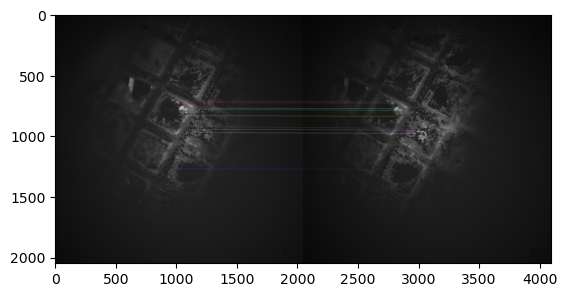

In [147]:
img3 = cv2.drawMatches(image8bit,keypoints,image8bit2,keypoints2,matches[:10],None, flags=2)
plt.imshow(img3),
plt.show()



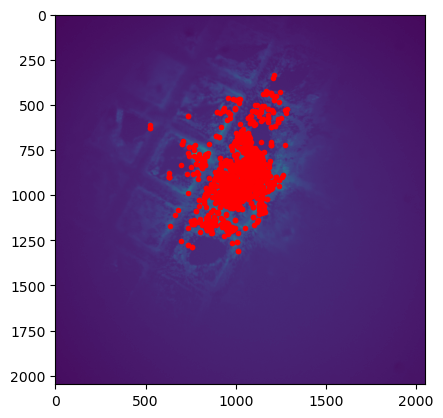

In [143]:
# plot shifted image
plt.imshow(image8bit2)

In [ ]:
(H, status) = cv2.findHomography(pts1, pts2, cv.RANSAC)

In [160]:
from stitch2d import create_mosaic, StructuredMosaic

In [161]:
path = r"Y:\Projects\piescope\piescope_dev\tile"

In [162]:
structured_mosaic = StructuredMosaic(path, dim=(3, 3))

In [164]:
from stitching import AffineStitcher

In [165]:
print(AffineStitcher.AFFINE_DEFAULTS)

{'estimator': 'affine', 'wave_correct_kind': 'no', 'matcher_type': 'affine', 'adjuster': 'affine', 'warper_type': 'affine', 'compensator': 'no'}


In [167]:
settings = {# The whole plan should be considered
            "crop": False,
            # The matches confidences aren't that good
            "confidence_threshold": 0.5}  

In [168]:
stitcher = AffineStitcher(**settings)

In [171]:
panorama = stitcher.stitch([r'Y:\Projects\piescope\piescope_dev\tile\channel_1\0_8bit.tif',r'Y:\Projects\piescope\piescope_dev\tile\channel_1\1_8bit.tif'])

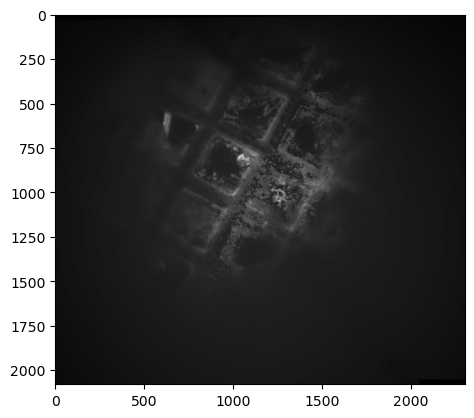

In [172]:
plt.imshow(panorama)
plt.show()


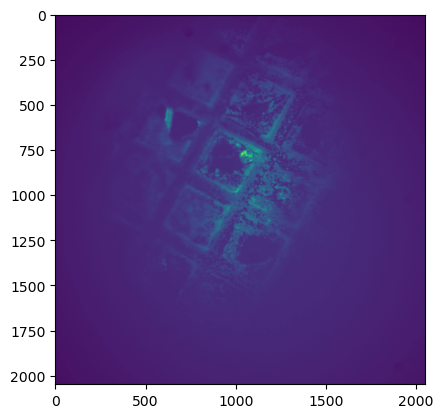

In [173]:
plt.imshow(image8bit)
plt.show()

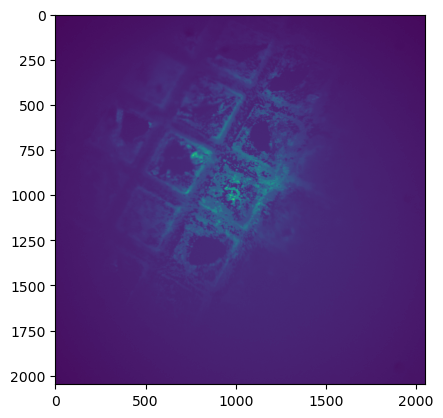

In [174]:
plt.imshow(image8bit2)

In [176]:
image_list = glob(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\*.tif')

In [178]:
for i in image_list:
    array = tf.imread(i)
    image8bit = cv2.normalize(array, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    cv2.imwrite(i[:-4] + '_8bit.tif', image8bit)

In [179]:
image_8bit_list = glob(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\*_8bit.tif')


['Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\0_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\1_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\2_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\3_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\4_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\5_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\6_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\7_8bit.tif', 'Y:\\Projects\\piescope\\piescope_dev\\tile\\channel_1\\8_8bit.tif']


In [181]:
panorama_8bit = stitcher.stitch(image_8bit_list)


In [198]:
panorama_8bit.shape

(2616, 2615, 3)

C:\Users\Dadie1\AppData\Local\Temp\ipykernel_22684\3070978457.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(panorama_8bit[:, :, 0]), cmap='turbo')


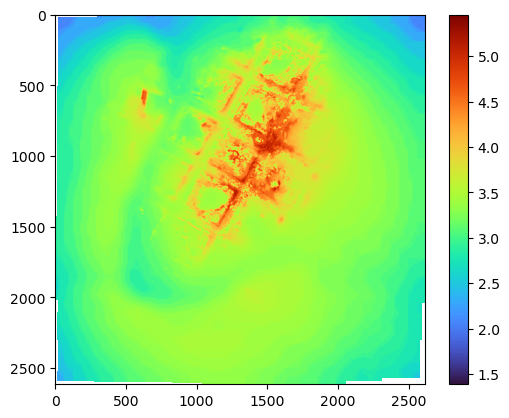

In [201]:
plt.imshow(np.log(panorama_8bit[:, :, 0]), cmap='turbo')
plt.colorbar()
plt.show()

In [193]:
nimages = []
for i in image_8bit_list:
    im = tf.imread(i)
    images.append(im)

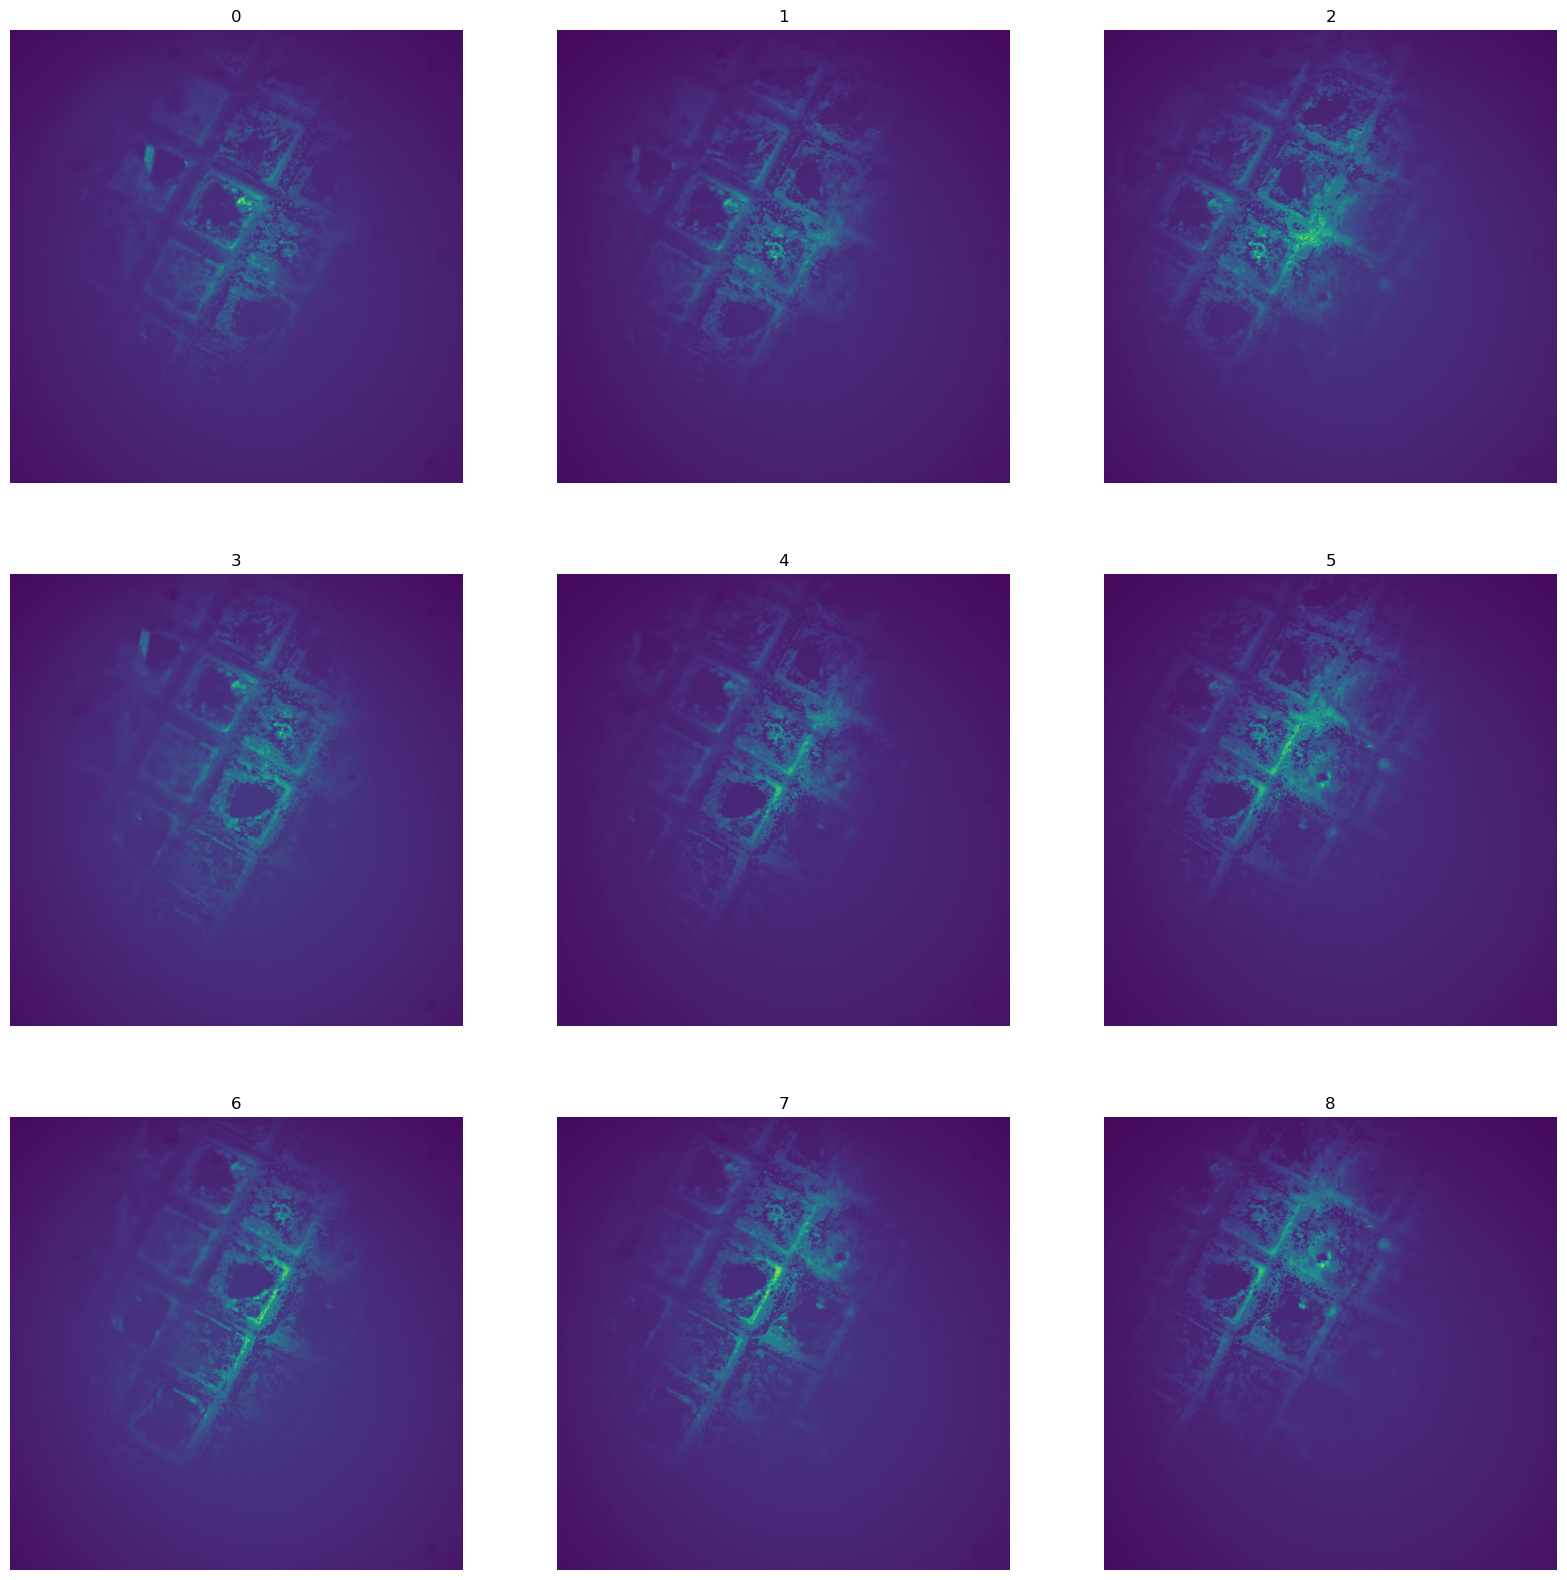

In [194]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

# plot 9 images on a 3x3 grid with only the index of the image
for i, image in enumerate(images):
    ax[i // 3, i % 3].imshow(image)
    ax[i // 3, i % 3].set_title(i)
    ax[i // 3, i % 3].axis('off')
    


In [204]:
# split images into 3 smaller subset arrays
images1 = image_8bit_list[:3]
images2 = image_8bit_list[3:6]
images3 = image_8bit_list[6:9]


In [205]:
panorama_8bit1 = stitcher.stitch(images1)
panorama_8bit2 = stitcher.stitch(images2)
panorama_8bit3 = stitcher.stitch(images3)


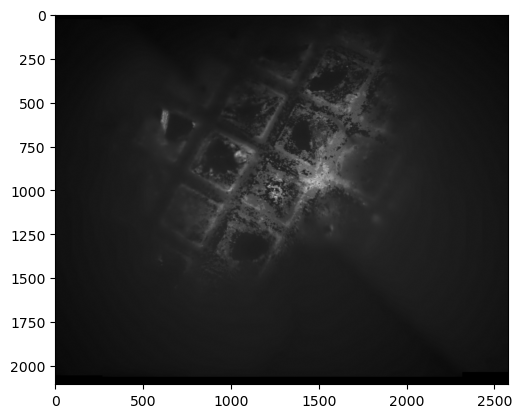

In [206]:
plt.imshow(panorama_8bit1)

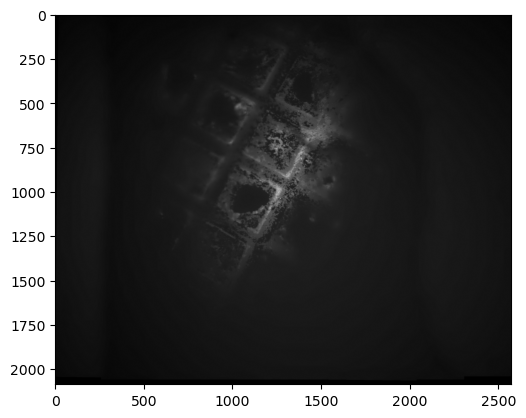

In [207]:
plt.imshow(panorama_8bit2)

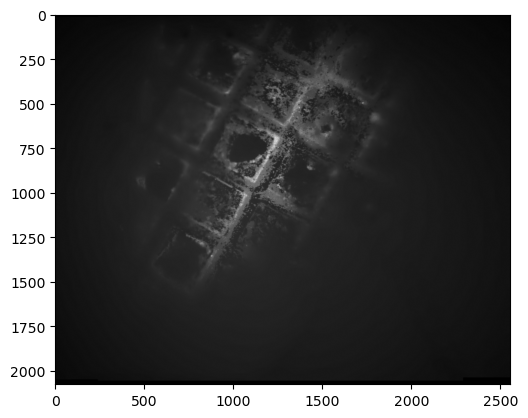

In [208]:
plt.imshow(panorama_8bit3)

In [210]:
# save the 3 panorama
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit1.tif', panorama_8bit1)
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit2.tif', panorama_8bit2)
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit3.tif', panorama_8bit3)


True

In [226]:
# rotate the panoramas by 90 degrees
panorama_8bit1_rot = np.rot90(panorama_8bit1)
panorama_8bit2_rot = np.rot90(panorama_8bit2)
panorama_8bit3_rot = np.rot90(panorama_8bit3)

# save the rotated panoramas
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit1_rot.tif', panorama_8bit1_rot)
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit2_rot.tif', panorama_8bit2_rot)
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit3_rot.tif', panorama_8bit3_rot)


True

In [229]:
panorama_rotated_left = stitcher.stitch([r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit3_rot.tif', r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit2_rot.tif'])
panorama_rotated_right = stitcher.stitch([r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit2_rot.tif', r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit1_rot.tif'])

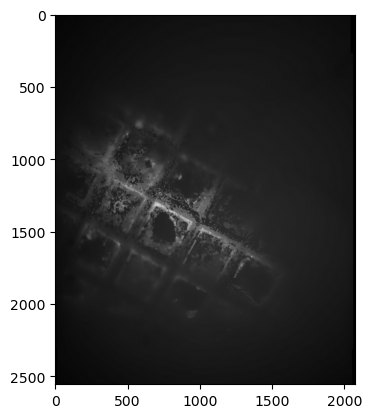

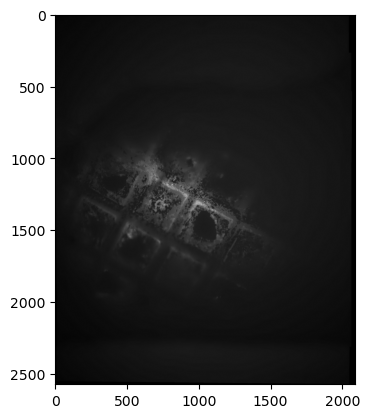

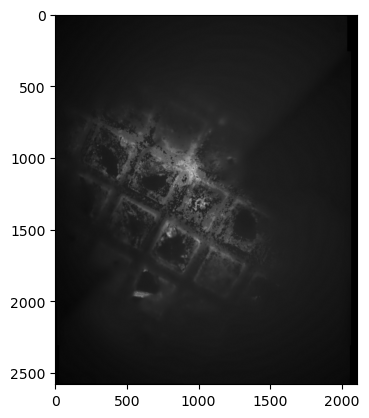

In [228]:
plt.imshow(panorama_8bit3_rot)
plt.show()

plt.imshow(panorama_8bit2_rot)
plt.show()

plt.imshow(panorama_8bit1_rot)
plt.show()

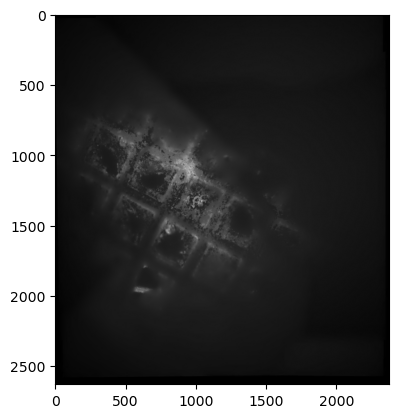

In [230]:
plt.imshow(panorama_rotated_right)
plt.show()

In [231]:
cv2.imwrite(r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_rotated_right.tif', panorama_rotated_right)

True

In [232]:
panorama_final = stitcher.stitch([r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_8bit3_rot.tif', r'Y:\Projects\piescope\piescope_dev\tile\channel_1\panorama_rotated_right.tif'])

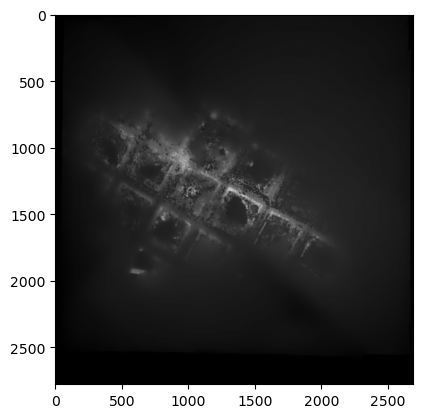

In [233]:
plt.imshow(panorama_final)

In [234]:
# rotate the final panorama by -90 degrees
panorama_final_rot = np.rot90(panorama_final, k=-1)



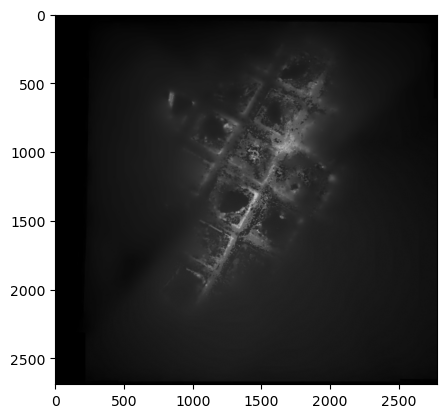

: 

In [235]:
plt.imshow(panorama_final_rot)